# Linear Regression for sin(X) estimation<br>
#### Lakshya Garg<br> 211000027

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math



### Loaded Libraries

In [3]:
X=np.arange(0,2*math.pi,0.1,dtype=float)
Y=np.sin(X)
Y


array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

In [4]:
X_train_5=np.zeros((X.shape[0],5))
X_train_10=np.zeros((X.shape[0],10))
y_train=Y
for i in range(5):
    X_train_5[:,i] =X**(i+1)
for i in range(10):
    X_train_10[:,i] =X**(i+1)

X_train_10
X_train_5.shape


(63, 5)

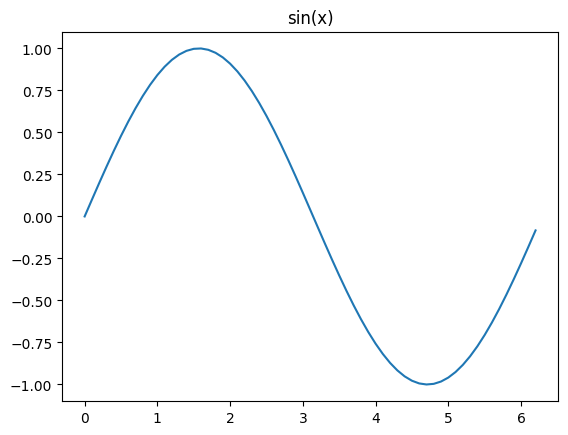

In [5]:
plt.plot(X,Y)
plt.title("sin(x)")
plt.show()

In [40]:
class LR:
    
    
    def __init__(self):
        pass    
        
    
    def fit_GD(self,X_train,y_train,epochs,alpha):
        cost_history=[]
        self.weights=np.ones(X_train.shape[1])
        new_weights=np.zeros(X_train.shape[1])
        self.bias=(np.min(y_train)+np.max(y_train))/2
        for k in range(epochs):
            cost_history.append(self.MSE(y_train,self.predict(X_train)))
            new_bias=np.average((np.dot(self.weights.T,X_train.T)+self.bias-y_train))
            new_weights=np.average((np.matmul(self.weights.T**2,X_train.T)+self.bias-y_train))

                
            self.weights-=(new_weights*alpha)
                # updating weights
            self.bias-=(alpha*new_bias)
                # updating bias
        cost_history.append(self.MSE(y_train,self.predict(X_train)))
        return cost_history
    
    def fit_SGD(self,X_train,y_train,epochs,alpha):
        cost_history=[]
        self.weights=np.ones(X_train.shape[1])
        new_weights=np.zeros(X_train.shape[1])
        self.bias=(np.min(y_train)+np.max(y_train))/2
        for k in range(epochs):
            X_train_selected=[]
            y_train_selected=[]
            for i in range(X_train.shape[0]):
                key=np.random.randint(0,X_train.shape[0])
                X_train_selected.append(X_train[key])
                y_train_selected.append(y_train[key])
            cost_history.append(self.MSE(y_train_selected,self.predict(X_train_selected)))
            # for i in range(X_train.shape[0]):
            new_weights=np.average((np.matmul(X_train_selected,self.weights.T**2)+self.bias-y_train_selected)*self.weights)
            # for i in range(X_train.shape[0]):
            new_bias=np.average((np.matmul(X_train_selected,self.weights)+self.bias-y_train_selected))

                
            # for j in range(X_train.shape[1]):
            self.weights-=(new_weights*alpha)
                # updating weights
            self.bias-=(alpha*new_bias)
                # updating bias
        cost_history.append(self.MSE(y_train_selected,self.predict(X_train_selected)))
        return cost_history


    def fit_direct(self,X_train,y_train):
        X_train_orig=X_train
        X_train=np.hstack((X_train,np.ones((X_train.shape[0],1))))
        self.weights=np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.bias=self.weights[-1]
        self.weights=self.weights[0:-1]
        return self.MSE(y_train,self.predict(X_train_orig))


    
    def predict(self,X_test):
        return np.matmul(X_test,self.weights)+self.bias
        
    
    def MSE(self,y_true,y_pred):
        a=y_true-y_pred
        return np.sum(a**2)/a.shape[0]
    # function for Mean Square Error Calculation 
    # It involves no loops it is faster (vectorized)

    def SSR(self,y_true,y_pred):
        a=y_true-y_pred
        return np.sum(a**2)
    
    def SST(self,y_true,y_pred):
        a=y_true-np.average(y_pred)
        return np.sum(a**2)
    
    def SSE(self,y_true,y_pred):
        return self.SST(y_true,y_pred)-self.SSR(y_true,y_pred)
    
    def R2(self,y_true,y_pred):
        return 1-self.SSR(y_true,y_pred)/self.SST(y_true,y_pred)
    
    
    
    


In [41]:
model=LR()
graph_GD=model.fit_GD(X_train_5,y_train,  15,0.00003)

In [42]:
y_pred_5=model.predict(X_train_5)

In [43]:
print("MSE: ",model.MSE(y_train,y_pred_5))
print("SSE: ",model.SSE(y_train,y_pred_5))
print("SSR: ",model.SSR(y_train,y_pred_5))
print("SST: ",model.SST(y_train,y_pred_5))
print("R2: ",model.R2(y_train,y_pred_5))



MSE:  3281373.6159910536
SSE:  -141364651.08939117
SSR:  206726537.80743638
SST:  65361886.7180452
R2:  -2.1627994262038803


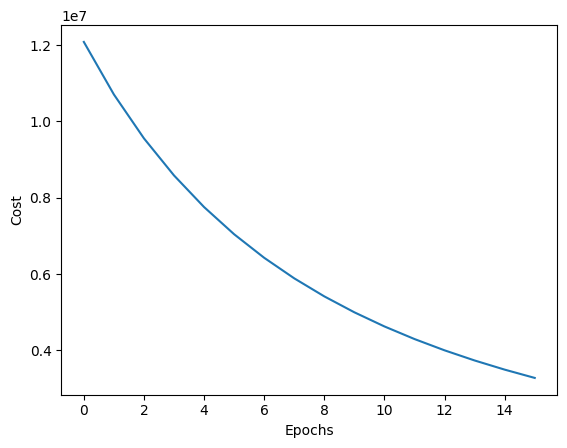

In [44]:
plt.plot(graph_GD)
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.show()

In [52]:
graph_GD=model.fit_GD(X_train_10,y_train,15,0.00000003)

In [53]:
y_pred_10=model.predict(X_train_10)
print(model.MSE(y_train,y_pred_10))

15284519827033.777


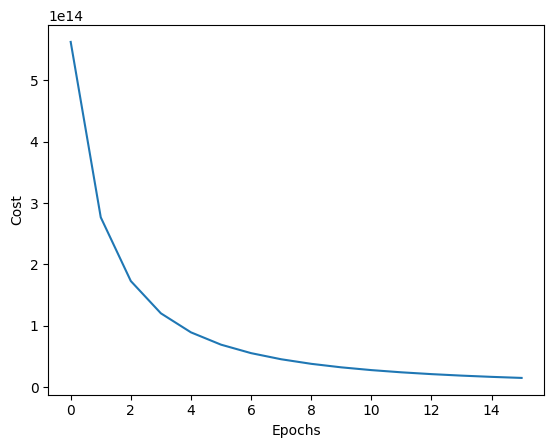

In [54]:
plt.plot(graph_GD)
plt.xlabel('Epochs')
plt.ylabel("Cost")
plt.show()

In [55]:
print("MSE: ",model.MSE(y_train,y_pred_10))
print("SSE: ",model.SSE(y_train,y_pred_10))
print("SSR: ",model.SSR(y_train,y_pred_10))
print("SST: ",model.SST(y_train,y_pred_10))
print("R2: ",model.R2(y_train,y_pred_10))


MSE:  15284519827033.777
SSE:  -793437201255399.2
SSR:  962924749103128.0
SST:  169487547847728.78
R2:  -4.681389348840188
